<a href="https://colab.research.google.com/github/alessandrapaz1680/TCC_Alessandra_P_Paz/blob/master/Revisao_Script_TCC_AlessandraPPaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objetivo

O seguinte trabalho propõe o desenvolvimento do modelo matemático para o modelo de Markowitz aplicado aos fundos de investimento imobiliário que compõem o IFIX da Bovespa, buscando analisar os efeitos da diversificação no portfólio ótimo e criar um portfólio que otimiza o risco-retorno dos investimentos disponíveis, escolhendo os pesos ideais pra cada ativo na carteira.

O alvo desta análise é servir como base para a tomada de decisões de investidores e popularização da ciência de dados em contextos práticos de investimento.
Ao fim da análise, um Gráfico é construído com a Fronteira Eficiente de Markowitz, trazendo didática e análises úteis aos tomadores de decisão.

O objetivo geral deste trabalho é construir o portfólio ótimo composto pelos Fundos de Investimento Imobiliário (FII) com maior participação no Índice de Fundos Imobiliários (IFIX) da B3. O trabalho também aborda outros aspectos relacionados ao processo de construção do portfólio ótimo que são:

*   Como realizar uma otimização de Markowitz e uma fronteira eficiente utilizando ferramentas como Python para o desenvolvimento de scripts - Neste trabalho mostra uma simulação da carteira com: Kinea Índice de Preços (KNIP), CGHG Logística (HGLG), Maxi Renda (MXRF), Kinea Renda Imobiliária (KNRI), Vinci Shopping Centers (VISC) que compõem o IFIX, calculando qual peso ideal para cada ação em uma carteira de investimento. Essa é só uma, de várias aplicações, que o python tem aplicado ao cenário de finanças e pode ser peça fundamental em uma análise de Data Science.
*   Desenvolver matematicamente o modelo de portfólio ótimo de Markowitz
*   Análise do comportamento dos Ativos através dos calculos e resultados de Estatisticas Descritivas.




##Materiais e Métodos

###Dados –IFIX B3

Segundo a B3, O IFIX é o resultado de uma carteira teórica de ativos composta
pelas cotas de Fundos de Investimentos Imobiliários listados nos mercados de bolsa e de balcão organizado da B3. Ainda, os índices da B3 utilizam procedimentos e regras constantes do Manual de Definições e Procedimentos dos Índices da B3.

O objetivo do IFIX é ser o indicador do desempenho médio das cotações dos fundos imobiliários negociados nos mercados de bolsa e de balcão organizado da B3, portanto O IFIX é composto pelas cotas de Fundos de Investimentos Imobiliários listados nos mercados da B3

Os principais Fundos de Investimento Imobiliário performando no IFIX, de acordo
com [Porto, 2020], estão descritos na Figura 1. Os dados foram coletados da plataforma Yahoo Finance, e o período de coleta foi padronizado de 01/01/2018 até 20/08/2023. Os valores diários utilizados para a construção do modelo foram a média dos valores de fechamento ajustado [Adj.Close], e as rentabilidades foram calculadas encima destes valores.

##Instalando e importando bibliotecas

In [ ]:
import pandas as pd   # para manipulação e análise de dados
from pandas_datareader import data as pdr # extraem dados de várias fontes da Internet para um DataFrame no pandas
import matplotlib.pyplot as plt # para plotagem de gráficos e figuras
import matplotlib.ticker as mtick # para plotagem de gráficos
import numpy as np # para manipulação de arranjos e matrizes
import math # para cálculo e funçoes matemáticas
import scipy as sco # para minimizar funções objetivo, para algoritmos de otimização locais e globais
from scipy import stats
import yfinance as yf # para coletar dados online, e com ele podemos coletar os dados financeiros do Yahoo
yf.pdr_override() # substituir yfinance por pandas

##Defiindo Ativos para Compor a Carteira

Carteira composta por Ativos conforme "Composição do IFIX". Conforme Tabela 1.

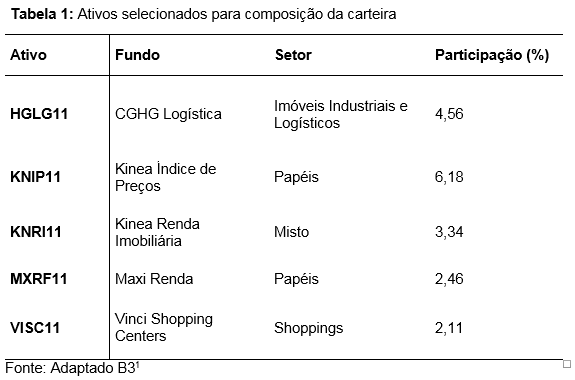

### Entrar com ".SA" nos Ativos/tickers:

In [ ]:
tickers = ['HGLG11.SA','KNIP11.SA', 'KNRI11.SA', 'MXRF11.SA', 'VISC11.SA']

###Definindo o período da lista de Ativos para Ánalise.

In [ ]:
inicio = '2020-09-21'
fim = '2023-08-21'

###Importando histórico de ações

Figura 1 - Preços dos ativos para o período

In [ ]:
precos = yf.download(tickers, start = inicio, end = fim)['Adj Close']
precos

[*********************100%%**********************]  5 of 5 completed


Ticker,HGLG11.SA,KNIP11.SA,KNRI11.SA,MXRF11.SA,VISC11.SA
Date,,,,,
2020-09-21,136.191376,89.567726,143.114395,8.375845,94.762253
2020-09-22,138.296249,88.760071,143.528137,8.422724,94.423828
2020-09-23,138.378433,89.486946,143.519547,8.453978,94.339211
2020-09-24,138.584030,89.083145,143.674683,8.516482,92.393196
2020-09-25,138.649796,89.083145,143.097168,8.493044,93.163139
...,...,...,...,...,...
2023-08-14,155.499100,88.046967,153.361725,9.865586,111.591766
2023-08-15,155.403107,88.305351,154.219589,9.865586,111.791138
2023-08-16,155.623871,88.468063,154.209961,9.865586,112.439468


###Gráfico da Série histórica de Preços.

In [ ]:
preco_100 = (precos/precos.iloc[0]*100) # trava no primeiro registro da série
preco_100.head()

Ticker,HGLG11.SA,KNIP11.SA,KNRI11.SA,MXRF11.SA,VISC11.SA
Date,,,,,
2020-09-21,100.000000,100.000000,100.000000,100.000000,100.000000
2020-09-22,101.545526,99.098274,100.289099,100.559691,99.642870
2020-09-23,101.605871,99.909811,100.283096,100.932833,99.553575
2020-09-24,101.756833,99.458978,100.391496,101.679083,97.500000
2020-09-25,101.805121,99.458978,99.987963,101.399249,98.312500


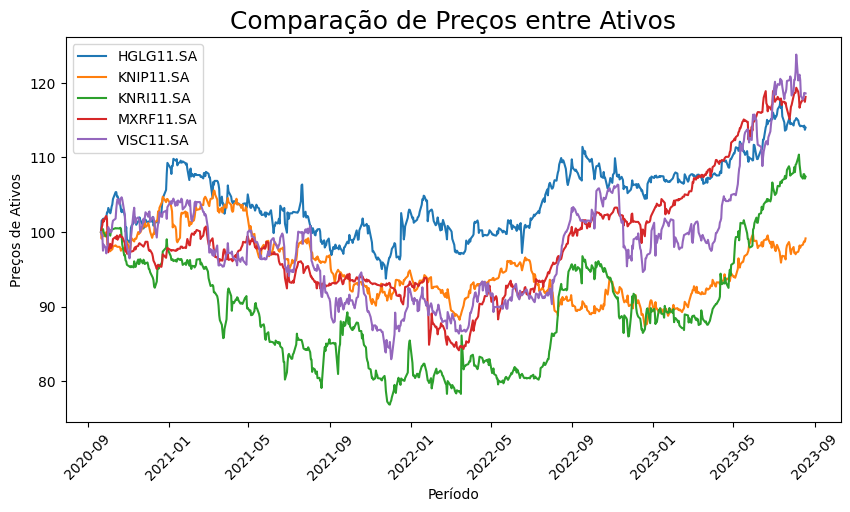

In [ ]:
df = preco_100
fig, ax = plt.subplots(figsize=[10, 5])

for col in df.columns:
  plt.plot(df[col], label=col) # label com a coluna do dataframe

plt.xticks(rotation=45)
ax.set_title('Comparação de Preços entre Ativos', fontsize=18)
ax.set_xlabel('Período')
ax.set_ylabel('Preços de Ativos')
plt.legend()
plt.show()

##Métodos:
###Estimar covariância, correlação, retornos e risco.

Para Empregar todo o Método de Cálculo da Teoria Moderna de Markowitz para quantificar os "Pesos" de cada Ativo que compõem a Carteira de Investimento foi necessário Calcular/Estimar:

*   Covariância:
$$ cov_{(x,y)} = \frac {\sum_{i=1}^{n} (X_i - \overline{X}) . (Y_i - \overline{Y})}{n - 1} $$

*   Correlação ,
$$ r = \frac{cov_{(x,y)}}{(σ_x . σ_y)} = \frac {\sum_{i=1}^{n} ((X_i - \overline{X}) . (Y_i - \overline{Y}))}{\sqrt\sum_{i=1}^{n} (X_i - \overline{X})^2 . (Y_i - \overline{Y}) } $$

*   Retorno (Contínuo) Médio Acumulado da Carteira:
$$ Ret_{ativo_i} = ln(\frac{preço_t}{preço_{t-1}}) $$
$$ Ret_{Cart} ={\sum_{i=1}^{n} W_i . Ret_{ativo_i}}$$

*   Risco Acumulado da Carteira por Desvio Padrão:
$$σ= \sqrt\frac{\sum(X_i - \overline{X})^2}{n} $$

$$Risco_{Cart} = \sqrt {\begin{bmatrix} w_1 & \cdots & w_n \end{bmatrix} . \begin{bmatrix} covar_{11} & \cdots & covar_{1n} \\ \vdots & \ddots & \vdots \\ covar_{n1} & \cdots & covar_{nn} \\ \end{bmatrix} . \begin{bmatrix} w_1 \\ \vdots \\  w_n  \\ \end{bmatrix}} $$





In [ ]:
retornos = precos.pct_change().dropna() # retirar registros com 'NaN'
rotulo= retornos.columns.to_list()
media_retornos=retornos.mean()
vol=retornos.std()
matriz_correl=retornos.corr()
matriz_covar=retornos.cov()

matriz_correl # Matriz de Correlação

Ticker,HGLG11.SA,KNIP11.SA,KNRI11.SA,MXRF11.SA,VISC11.SA
Ticker,,,,,
HGLG11.SA,1.000000,0.162278,0.211192,0.212879,0.273620
KNIP11.SA,0.162278,1.000000,0.132594,0.146848,0.136856
KNRI11.SA,0.211192,0.132594,1.000000,0.206557,0.227695
MXRF11.SA,0.212879,0.146848,0.206557,1.000000,0.144940
VISC11.SA,0.273620,0.136856,0.227695,0.144940,1.000000


In [ ]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

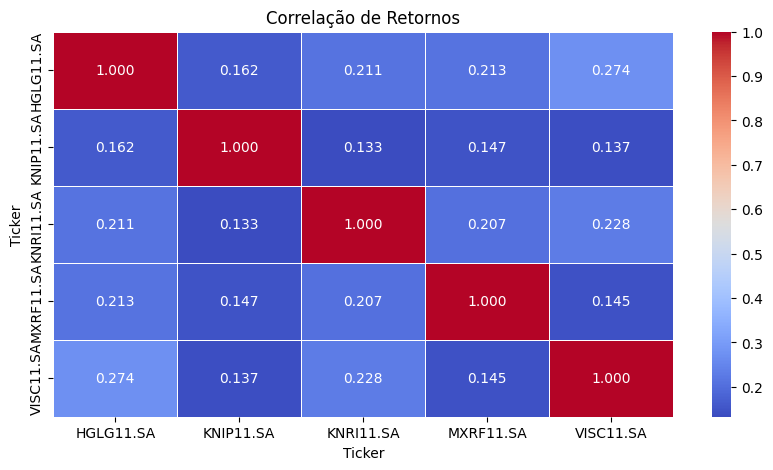

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(retornos.corr(), annot= True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title ('Correlação de Retornos')
plt.show

In [ ]:
matriz_covar # Matriz de Covariância

Ticker,HGLG11.SA,KNIP11.SA,KNRI11.SA,MXRF11.SA,VISC11.SA
Ticker,,,,,
HGLG11.SA,0.000050,0.000007,0.000014,0.000009,0.000018
KNIP11.SA,0.000007,0.000033,0.000007,0.000005,0.000007
KNRI11.SA,0.000014,0.000007,0.000088,0.000011,0.000020
MXRF11.SA,0.000009,0.000005,0.000011,0.000034,0.000008
VISC11.SA,0.000018,0.000007,0.000020,0.000008,0.000084


In [ ]:
retornos = np.log(precos/precos.shift(1)).dropna()
retornos

Ticker,HGLG11.SA,KNIP11.SA,KNRI11.SA,MXRF11.SA,VISC11.SA
Date,,,,,
2020-09-22,0.015337,-0.009058,0.002887,0.005581,-0.003578
2020-09-23,0.000594,0.008156,-0.000060,0.003704,-0.000897
2020-09-24,0.001485,-0.004523,0.001080,0.007366,-0.020844
2020-09-25,0.000474,0.000000,-0.004028,-0.002756,0.008299
2020-09-28,-0.000178,-0.000091,-0.005679,0.006419,-0.004369
...,...,...,...,...,...
2023-08-14,-0.000617,0.001414,-0.003263,0.003795,-0.003991
2023-08-15,-0.000618,0.002930,0.005578,0.000000,0.001785
2023-08-16,0.001420,0.001841,-0.000062,0.000000,0.005783


###Geração de portfolios

In [ ]:
n_portfolios=10000

p_ret=[]
p_vol=[]
p_pesos=[]

n_ativos=len(retornos.columns)  # Quantidade de ativos

for portfolios in range(n_portfolios):
  pesos=np.random.random(n_ativos) # Pesos aleatórios
  pesos=pesos/np.sum(pesos) # Pesos que somam 1
  p_pesos.append(pesos)

  returns=np.dot(pesos,media_retornos) # Retornos
  p_ret.append(returns)

  var=matriz_covar.mul(pesos, axis=0).mul(pesos, axis=1).sum().sum() # Covariância
  dp=np.sqrt(var) # Desvio Padrão
  p_vol.append(dp)

p_ret=np.array(p_ret)
p_vol=np.array(p_vol)
dados={'Risco':p_vol, 'Retorno':p_ret}
portfolios=pd.DataFrame(dados)
portfolios

,Risco,Retorno
0,0.004969,0.000148
1,0.005267,0.000177
2,0.004902,0.000226
3,0.004603,0.000147
4,0.004878,0.000225
...,...,...
9995,0.004519,0.000181
9996,0.004679,0.000152
9997,0.004530,0.000144
9998,0.005031,0.000209


from matplotlib import pyplot as plt
portfolios['Risco'].plot(kind='hist', bins=20, title='Risco')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
portfolios['Retorno'].plot(kind='hist', bins=20, title='Retorno')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
portfolios.plot(kind='scatter', x='Risco', y='Retorno', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
portfolios['Risco'].plot(kind='line', figsize=(8, 4), title='Risco')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
portfolios['Retorno'].plot(kind='line', figsize=(8, 4), title='Retorno')
plt.gca().spines[['top', 'right']].set_visible(False)

##Gráfico de porfólios gerados

Figura 5 - Plotagem das 10 mil carteiras simuladas via Markowitz

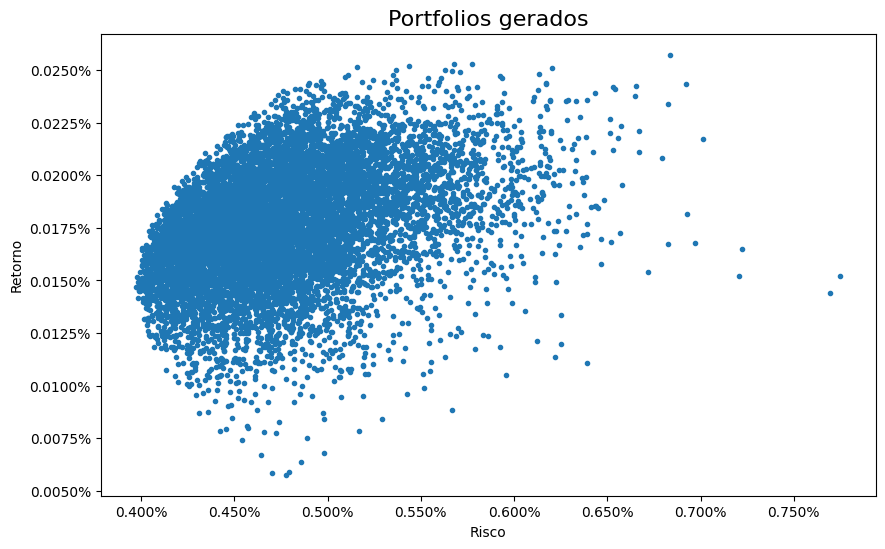

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(portfolios['Risco'],portfolios['Retorno'], marker='.')
plt.title('Portfolios gerados', fontsize=16)
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

###Portfólios com Sharpe:

#### Ativo Livre de Risco

Foi utilizada a Taxa Selic como parâmetro de ativo livre de risco.

Conversão a taxa anual em diária

$$ tx_{dia}  = \sqrt[252]{tx_{ano}} - 1 $$

In [ ]:
tx=0.13

rf = ((tx + 1)**(1/252))-1
print('Taxa livre de risco diária: ', '{:.2%}'.format(rf))

Taxa livre de risco diária:  0.05%


##Carteira de Menor Risco
Menor volatilidade

###Definição das funções para definir retorno e risco

In [ ]:
def port_ret(pesos): #Função de cálculo de retorno
  return np.sum(media_retornos*pesos)

def port_vol(pesos): #Função de cálculo de risco
  return math.sqrt(np.dot(pesos,np.dot(matriz_covar, pesos))) # Faz a multiplicação automática de transposição do vetor

###Defini limites mínimo e máximo de alocação na função


In [ ]:
tpl1 = 0.01     # limite mínimo de alocação
tpl2 = 1-tpl1   # limite máximo de alocação

restri = ({'type':'eq','fun':lambda x: np.sum(x)-1}) # A soma dos pesos é 1
bnds=tuple((tpl1,tpl2) for x in range(n_ativos)) # Gera uma tupla de (tpl1,tpl2) para cada ativo
pesos_i=np.array(n_ativos*[1/n_ativos]) # Inicia com pesos iguais para todos os ativos
pesos_i
# bnds

array([0.2, 0.2, 0.2, 0.2, 0.2])

###Otimização da Carteira pelo método "SLSQP"

SLSQP – Sequencial Least Squares Programming – é um método de otimização por programação quadrática sequencial, que se baseia na resolução de uma sequência de subproblemas, gerados a partir do problema inicial, cujas soluções convergem para a solução do problema inicial.

In [ ]:
otim_menor_vol=sco.optimize.minimize(port_vol, pesos_i, method='SLSQP', bounds=bnds, constraints=restri)
#otim_menor_vol

###Pesos otimizados com menor risco

In [ ]:
peso_otimo = otim_menor_vol['x'].round(2)
ret_otimo = port_ret(otim_menor_vol['x'])
vol_otimo = port_vol(otim_menor_vol['x'])

print('Rótulos: ', rotulo,'\n',
      'Pesos  da carteira de menor risco:', peso_otimo,'\n',
      'Retorno da carteira de menor risco: ', '{:.2%}'.format(ret_otimo),'\n',
      'Risco da carteira de menor risco: ', '{:.2%}'.format(vol_otimo))

Rótulos:  ['HGLG11.SA', 'KNIP11.SA', 'KNRI11.SA', 'MXRF11.SA', 'VISC11.SA'] 
 Pesos  da carteira de menor risco: [0.21 0.35 0.06 0.32 0.07] 
 Retorno da carteira de menor risco:  0.02% 
 Risco da carteira de menor risco:  0.40%


##Fronteira eficiente Markowitz

Harry Markowitz criou em 1952 uma teoria que calcula o **risco** de uma carteira de investimento.

O objetivo do modelo é criar um portfólio que otimiza o **risco-retorno** dos investimentos disponíveis, **calculando os pesos ideais pra cada ativo na carteira.**

###Estimação da fronteira eficiente

In [ ]:
cons = ({'type':'eq','fun':lambda x: port_ret(x) - tret},{'type':'eq','fun':lambda x: np.sum(x)-1})
trets=np.linspace(p_ret.min(),p_ret.max(),50)
tvols=[]

for tret in trets:
  res = sco.optimize.minimize(port_vol,pesos_i,method='SLSQP',bounds=bnds, constraints=cons)
  tvols.append(res['fun'])

tvols=np.array(tvols)
# tvols

##Gráfico da fronteira eficiente com a carteira de menor risco

Figura 6. Fronteira eficiente estimada por SLSQP através da proposta de Markowitz (1952)

Cores baseadas no Índice Sharpe

$${\displaystyle IS={\frac {{\textsf {E}}[R-R_{f}]}{\sigma }}}$$

O índice de Sharpe é uma medida de como o retorno de um investimento é compensado em relação ao risco assumido. Quanto maior o índice de Sharpe, melhor é considerado o investimento, pois indica um maior retorno ajustado ao risco. Por outro lado, um índice de Sharpe menor indica um menor retorno em relação ao risco.

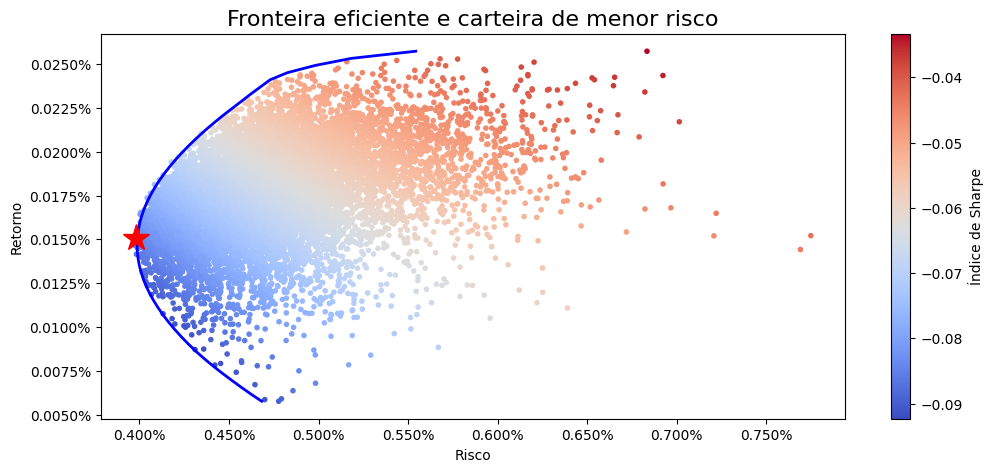

In [ ]:
#Gráfico da Fronteira Eficiente e carteira de menor risco
plt.figure(figsize=(12,5))
plt.scatter(p_vol,p_ret, c=(p_ret-rf)/p_vol, marker='.', cmap='coolwarm')
plt.plot(tvols,trets,'b', lw=2)
plt.plot(port_vol(otim_menor_vol['x']), port_ret(otim_menor_vol['x']),'r*', markersize=20)
plt.title('Fronteira eficiente e carteira de menor risco', fontsize=16)
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Índice de Sharpe')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

##Gráfico da alocação ótima da carteira de menor risco

Figura 7. Portfólio com pesos ideais para cada ativo na carteira

Text(0, 0.5, 'Pesos (%)')

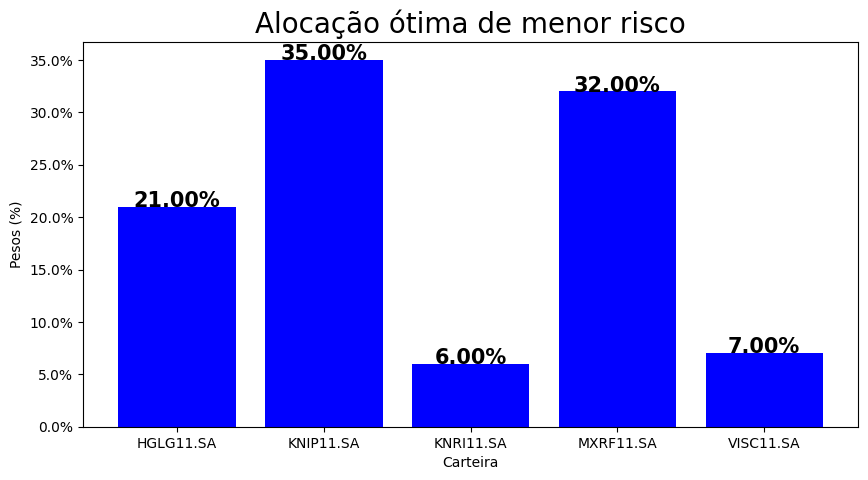

In [ ]:
import matplotlib.font_manager

font_list = matplotlib.font_manager.findSystemFonts()

x=rotulo
y=peso_otimo

# definir fonte
# font = {'family' : 'LiberationSans', 'weight' : 'bold', 'size' : 16}
font = {'weight' : 'bold', 'size' : 15}

# função para adicionar valor das barras
def addlabels(x,y):
    for i in range(len(x)):
#        plt.text(i,y[i],y[i], ha = 'center')
        plt.text(i, y[i], '{:.2%}'.format(y[i]), ha = 'center', **font )

fig, ax =plt.subplots(figsize=(10,5))

#Faz o gráfico de barras
plt.bar(x, y, color='blue' )

# chama a função para adicionar valor nas barras
addlabels(x, y)
# adiciona título
plt.title('Alocação ótima de menor risco', fontsize= 20)
# transforma eixo y em percentual
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xlabel('Carteira')
plt.ylabel('Pesos (%)')

## Carteira de Sharpe Máximo

In [ ]:
# Estimar carteira de Sharpe Ratio máximo
def min_func_sharpe(pesos):
  return -(port_ret(pesos)-rf)/port_vol(pesos)

# Otimização do Sharpe
otim_sharpe=sco.optimize.minimize(min_func_sharpe, pesos_i, method='SLSQP', bounds=bnds, constraints=restri)

In [ ]:
peso_otimo = otim_sharpe['x'].round(2)
ret_otimo = port_ret(otim_sharpe['x'])
vol_otimo = port_vol(otim_sharpe['x'])


###Gráfico da Fronteira Eficiente com carteira de Sharpe máximo

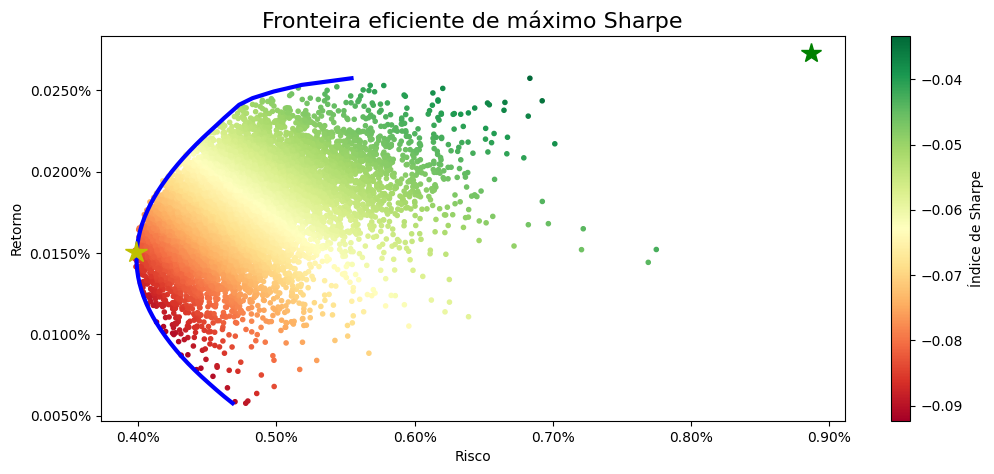

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(p_vol,p_ret, c=(p_ret-rf)/p_vol, marker='.', cmap='RdYlGn')
plt.plot(tvols,trets,'b', lw=3)
plt.plot(port_vol(otim_sharpe['x']), port_ret(otim_sharpe['x']),'g*', markersize=15) # Máximo Sharpe
plt.plot(port_vol(otim_menor_vol['x']), port_ret(otim_menor_vol['x']),'y*', markersize=16) # Menor Risco
plt.title('Fronteira eficiente de máximo Sharpe', fontsize=16)
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Índice de Sharpe')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

###Alocação da carteira de Sharpe máximo

Text(0, 0.5, 'Pesos (%)')

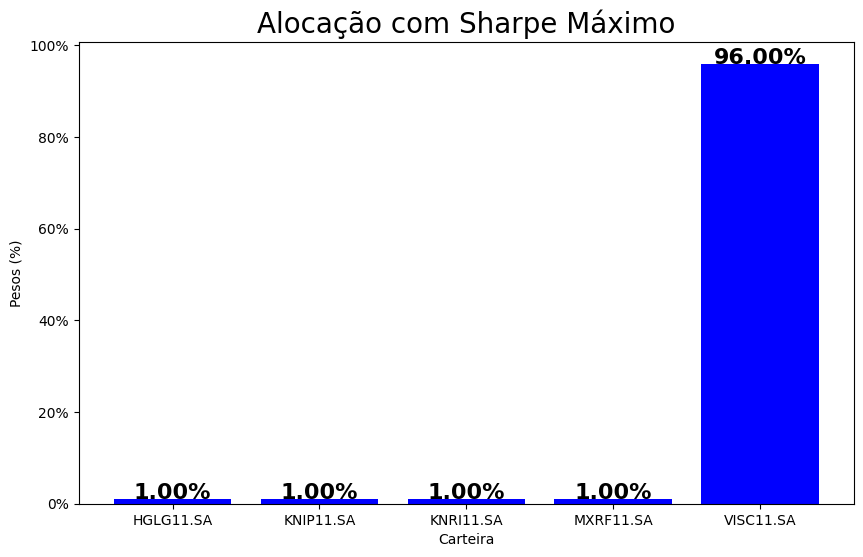

In [ ]:
x=rotulo
y=otim_sharpe['x'].round(3)

# definir fonte
font = {'weight' : 'bold', 'size' : 16}

# função para adicionar valor das barras
def addlabels(x,y):
    for i in range(len(x)):
#        plt.text(i,y[i],y[i], ha = 'center')
        plt.text(i, y[i], '{:.2%}'.format(y[i]), ha = 'center', **font )

fig, ax =plt.subplots(figsize=(10,6))

#Faz o gráfico de barras
plt.bar(x, y, color='blue' )

# chama a função para adicionar valor nas barras
addlabels(x, y)
# adiciona título
plt.title('Alocação com Sharpe Máximo', fontsize= 20)
# transforma eixo y em percentual
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xlabel('Carteira')
plt.ylabel('Pesos (%)')

### Benchmark - IFIX x Carteira de Sharpe Máximo.

Simulação de Investimento de 10.000 na Carteira de Sharpe Máximo em comparação ao Benchmark de Mercado -  IFIX

In [ ]:
cart_Sh_Max = {'HGLG11.SA': 100,'KNIP11.SA' : 100, 'KNRI11.SA': 100, 'MXRF11.SA': 100, 'VISC11.SA': 9600}

In [ ]:
precos = yf.download(list(cart_Sh_Max.keys()), start = inicio, end = fim, progress = False)['Adj Close']
compras_df = pd.Series(data = cart_Sh_Max, index = list(cart_Sh_Max.keys()))
primeiro = precos.iloc[0]
qtd_acoes = round(compras_df/primeiro, 0)
PL = precos*qtd_acoes
PL['Carteira'] = PL.sum(axis = 1)

In [ ]:
IFIX = yf.download('XFIX11.SA', start = inicio, end = fim)['Adj Close']
IFIX = pd.DataFrame(IFIX)
IFIX.rename(columns = {'Adj Close': 'IFIX'}, inplace = True)

consolidado = pd.merge(IFIX, PL, how = 'inner', on = 'Date')
consolidado_ajustado = consolidado/consolidado.iloc[0]

[*********************100%%**********************]  1 of 1 completed


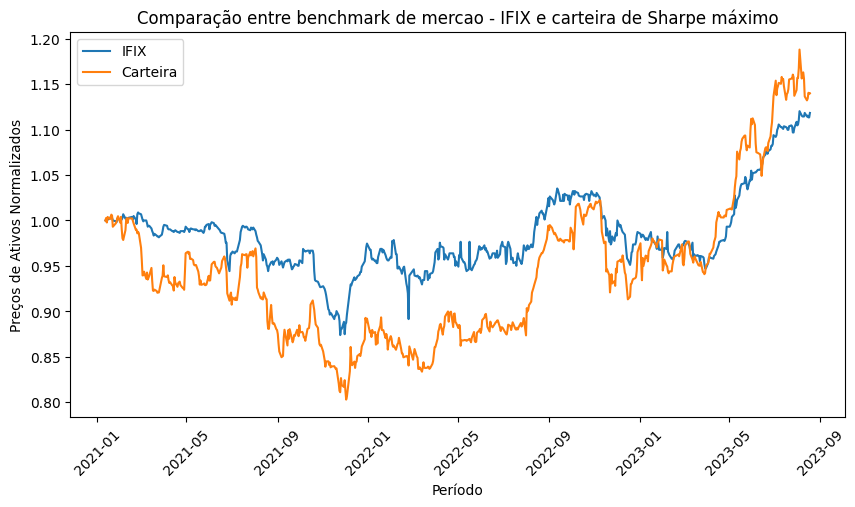

In [ ]:
import matplotlib.pyplot as plt

df = consolidado_ajustado[['IFIX', 'Carteira']]
fig, ax = plt.subplots(figsize=[10, 5])

for col in df.columns:
  plt.plot(df[col], label=col) # label com a coluna do dataframe

plt.xticks(rotation=45)
ax.set_title('Comparação entre benchmark de mercao - IFIX e carteira de Sharpe máximo', fontsize=12)
ax.set_xlabel('Período')
ax.set_ylabel('Preços de Ativos Normalizados')
plt.legend()
plt.show()